In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from src.data.file_utils import GetTV

In [71]:
mdl_path = "../models/lr_coef.txt"  # Replace with your file path

with open(mdl_path, "r") as file:
    coef = file.readlines()

mdl_path = "../models/lr_intercept.txt"  # Replace with your file path

with open(mdl_path, "r") as file:
    inter = file.readlines()
    
coef_ = np.array([float(i) for i in coef])
inter_ = np.array([float(i) for i in inter])
r_coef_ = coef_[:len(coef_)//2]
z_coef_ = coef_[len(coef_)//2:]

In [87]:
data_path = "../data/raw/tv_images/l-mode"
tv = GetTV(data_path)
files = tv.list_files()
radii = tv.load(files[0], 'radii')[0]
elevation = tv.load(files[0], 'elevation')[0]
vid_shape = tv.load(files[0], 'vid')[0].shape
vid_times = tv.load(files[0], 'vid_times')

In [74]:
frames = tv.load(files[0], 'vid')
frames_reshape = frames.reshape(len(frames), -1)

In [75]:
print(frames_reshape.shape)

(420, 172800)


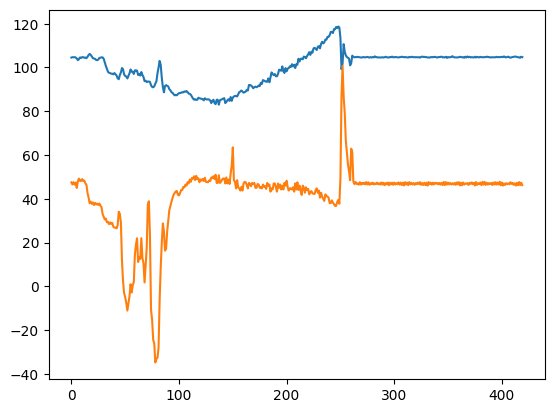

In [77]:
# example index 1
pred_r = np.dot(frames_reshape, r_coef_) + inter_[0] # left half
pred_z = np.dot(frames_reshape, z_coef_) + inter_[1] # right half
plt.plot(pred_r)
plt.plot(pred_z)
plt.show()

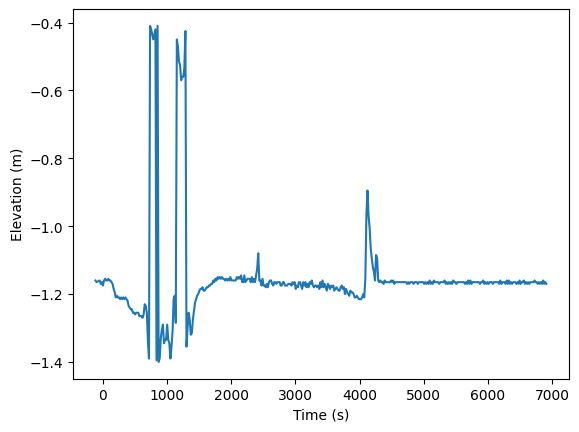

In [88]:
real_pred_r = radii[np.round(pred_r).astype(int)]
real_pred_z = elevation[np.round(pred_z).astype(int)]
plt.ylabel("Elevation (m)")
plt.xlabel("Time (s)")
plt.plot(vid_times,real_pred_z)
plt.show()